<html>
    <div style="display: flex; justify-content: center; align-items: center; height: 100%; flex-direction: column">
        <h2>Basic usage of <font color="tomato">Qiskit</font></h2>
        <div style="display: block; text-align: center">
            <p>- Biswayan Nandi</p>
        </div>
    </div>
    <hr>
</html>

- All the imports

In [13]:
from qiskit import QuantumCircuit, transpile
from qiskit.quantum_info import Statevector
from qiskit.visualization import plot_histogram
from qiskit_aer import AerSimulator

- We will be creating the simple ```entanglement circuit``` with *two qubits* and *two classical bits (for measurement)*
- But we will not do the measurement on the classical bits until we are interested in the results

/home/biswayannandi/.local/lib/python3.11/site-packages/qiskit/visualization/circuit/matplotlib.py:266: FutureWarning: The default matplotlib drawer scheme will be changed to "iqp" in a following release. To silence this warning, specify the current default explicitly as style="clifford", or the new default as style="iqp".
  self._style, def_font_ratio = load_style(self._style)


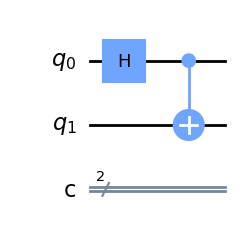

In [14]:
circuit = QuantumCircuit(2, 2)
circuit.h(0)
circuit.cx(0, 1)
circuit.draw(output='mpl')

- Inspecting the state of the qubits i.e. the effect of the hadamard and CNOT transformations on the qubits

In [15]:
state = Statevector.from_label('11')
state = state.evolve(circuit)
state.draw('latex')

<IPython.core.display.Latex object>

- Visualizing the bloch sphere of the state

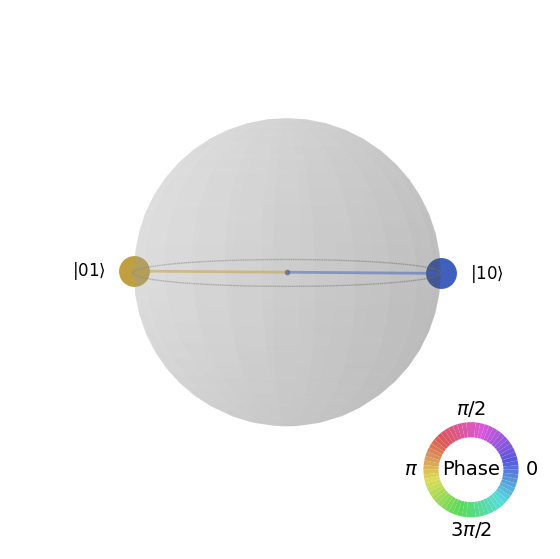

In [16]:
state.draw('qsphere')

- Measuring the two different qubits in two different classical bits

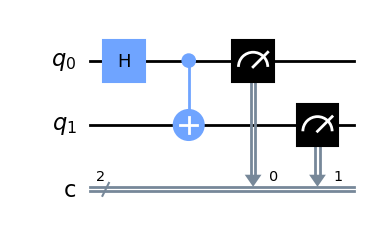

In [17]:
circuit.measure(0, 0)
circuit.measure(1, 1)
circuit.draw('mpl')

- Getting the outcome of the measurements when done ```shots``` time

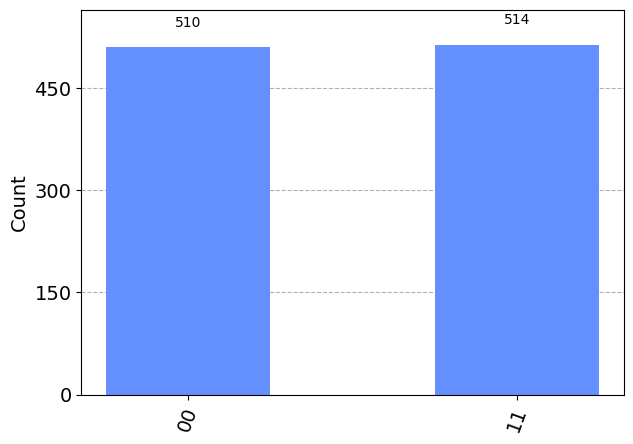

In [18]:
backend = AerSimulator()
circuit_compiled = transpile(circuit, backend)
simulator = backend.run(circuit_compiled, shots=1024)
result = simulator.result()
counts = result.get_counts(circuit_compiled)
plot_histogram(counts)